## **Model Creation**
- Import Data and Required Packages

In [19]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering libraries 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# model creation libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# model evaluation libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Load the csv file into dataframe

In [20]:
df = pd.read_csv('data/stud.csv')

### Show the top 5 rows

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


---

### Prepare the features and the target column

In [22]:
X = df.drop(columns=['writing_score'], axis=1)
y= df['writing_score']

In [23]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [24]:
y.head()

0    74
1    88
2    93
3    44
4    75
Name: writing_score, dtype: int64

In [25]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']

for col in cat_columns:
    print(f'Categroies in {col} column: {df[col].unique()} \n')

Categroies in gender column: ['female' 'male'] 

Categroies in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categroies in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categroies in lunch column: ['standard' 'free/reduced'] 

Categroies in test_preparation_course column: ['none' 'completed'] 



---

### Preprocess numerica and categorical features

In [26]:
# create column transformer to preprocess data
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

numeric_scaler = StandardScaler()
cat_oh_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', cat_oh_encoder, categorical_features),
        ('StandardScaler', numeric_scaler, numerical_features)
    ]
)

In [27]:
X = preprocessor.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 19), (300, 19), (700,), (300,))

---

### Model Building

In [30]:
# create a function to evaluate model performance
def evaluate(actual, predicted):
    """
    Evaluate the performance of the model.

    Args:
    actual: Actual/true values.
    predicted: Model predicted values.

    Returns:
    float: Performance metrics (R2 score, MSE, RMSE, MAE)
    """
    r2 = r2_score(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)

    return r2, rmse, mae

In [31]:
# model training
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'SVM': SVR(),
    'XGBRegressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model = model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate train and test data
    model_train_r2, model_train_rmse, model_train_mae = evaluate(y_train, y_train_pred)

    model_test_r2, model_test_rmse, model_test_mae = evaluate(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- R2 Score: 0.9476
- Root Mean Squared Error: 3.3730
- Mean Absolute Error: 2.6998
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7499
- Mean Absolute Error: 3.0811
- R2 Score: 0.9458


Ridge
Model performance for Training set
- R2 Score: 0.9477
- Root Mean Squared Error: 3.3677
- Mean Absolute Error: 2.6955
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7204
- Mean Absolute Error: 3.0727
- R2 Score: 0.9466


Lasso
Model performance for Training set
- R2 Score: 0.9049
- Root Mean Squared Error: 4.5429
- Mean Absolute Error: 3.6866
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.8162
- Mean Absolute Error: 3.8085
- R2 Score: 0.9105


Random Forest Regressor
Model performance for Training set
- R2 Score: 0.9896
- Root Mean Squared Error: 1.4991
- Mean Absolute Error: 1.2016
---------------------

---

### *Model results*

In [32]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'Performance/R2_Score']).sort_values(by='Performance/R2_Score', ascending=False)

In [33]:
results

,Model,Performance/R2_Score
1,Ridge,0.946608
0,Linear Regression,0.945758
6,XGBRegressor,0.914507
3,Random Forest Regressor,0.913540
2,Lasso,0.910526
7,AdaBoost Regressor,0.902679
4,K-Neighbors Regressor,0.890989
5,SVM,0.801075


---

##### Both Ridge and LR have same accuracy, for simplicity I'll choose Linear regression

In [34]:
liner_model = LinearRegression(fit_intercept=True)
liner_model = liner_model.fit(X_train, y_train)
y_pred = liner_model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f'Accuracy of linear regression is %.2f' %score)

Accuracy of linear regression is 0.95


### Plot actual and predicted values

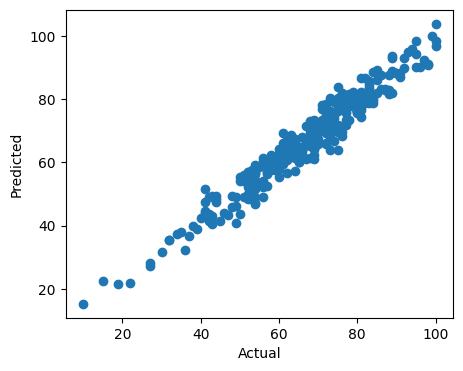

In [35]:
plt.figure(figsize=(5,4))
plt.scatter(x = y_test, y = y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

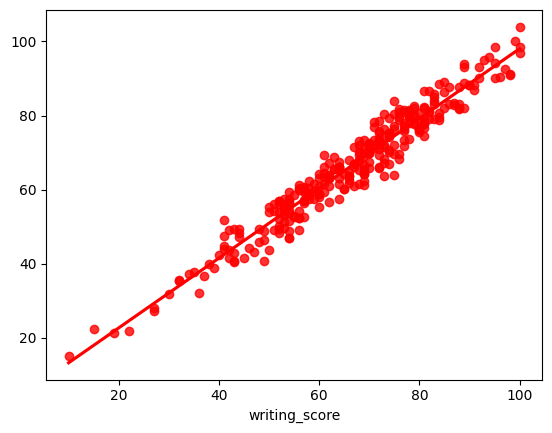

In [36]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()